In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from prutils import *
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.neural_network import MLPClassifier

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):

    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    
    plt.show()
    
    print(np.max(test_scores))
    return plt

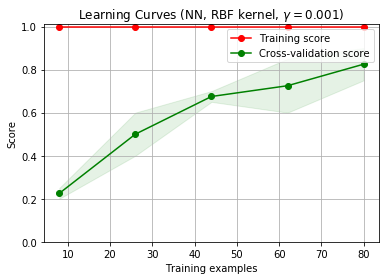

0.9

In [8]:
X_test, y_test = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)




title = "Learning Curves (NN, RBF kernel, $\gamma=0.001$)"
cv = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)
estimator = MLPClassifier(hidden_layer_sizes=(140, 85), max_iter=150, alpha=1,
                                    solver='lbfgs', tol=0, random_state=1,
                                    learning_rate_init=.1)

plot_learning_curve(estimator, title, X_test, y_test, (0, 1.01), cv=cv, n_jobs=4)

plt.show()

In [15]:
from sklearn.cross_validation import KFold, cross_val_score

X_train, y_train = get_random_batch(RAW_PIXELS_DATASET, split_validation=False)

kf = KFold(n_splits=2, random_state=None, shuffle=False)
kf = ShuffleSplit(n_splits=2, test_size=0.2, random_state=0)

X = X_train
y = y_train

for train_index, test_index in kf.split(X):
    # print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    print(X_train.shape, X_test.shape)
    y_train, y_test = y[train_index], y[test_index]
    
clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(400, 40), random_state=1, learning_rate_init=0.01)
cv = cross_val_score(clf, X_train, y_train, cv=kf, n_jobs=1, scoring='accuracy')
print(cv)

C:\Users\motos\machine_learning\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


(80, 900)

(20, 900)

(80, 900)

(20, 900)

TypeError: 'ShuffleSplit' object is not iterable